# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 



## Student Information 
Name: Nykole Edward 

Student ID: 108065438

GitHub ID: NykoleEdward


## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
#importing stop words library  
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
import numpy as np 
import helpers.data_mining_helpers as dmh
from sklearn import datasets
train_df['text'].unique().tolist()
count_vect = CountVectorizer()
traincounts = count_vect.fit_transform(train_df.text)

In [9]:
traincounts

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [10]:
count_vect.get_feature_names()[0:10]

['00', '000', '00pm', '00tiffanyr', '01', '02', '03', '0303', '034', '04']

In [11]:
sumofcounts= traincounts.sum(axis=0)

In [12]:
count_vect.get_feature_names()

['00',
 '000',
 '00pm',
 '00tiffanyr',
 '01',
 '02',
 '03',
 '0303',
 '034',
 '04',
 '08',
 '080',
 '09',
 '095',
 '10',
 '100',
 '1000',
 '100000000',
 '100g',
 '100k',
 '100s',
 '101',
 '104',
 '10am',
 '10carley',
 '10golds24',
 '11',
 '1133',
 '119',
 '11yo',
 '12',
 '123',
 '13',
 '130',
 '133',
 '134',
 '13c',
 '14',
 '1400',
 '147',
 '148',
 '15',
 '1564',
 '15_jordyn',
 '15yrs',
 '16',
 '1607',
 '1616',
 '168',
 '169',
 '16k',
 '17',
 '18',
 '19',
 '1975',
 '1_full_plus_by_gora',
 '1c',
 '1dayatatime',
 '1n',
 '1nataliemaines',
 '1pet',
 '1st',
 '1stworldprobs4vs',
 '1tbsp',
 '1voicematters',
 '20',
 '2000',
 '2004',
 '2005',
 '2007',
 '2012',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '20au',
 '20likes',
 '20th',
 '21st',
 '22',
 '23',
 '236',
 '23rd',
 '24',
 '244',
 '24th',
 '25',
 '25kish',
 '26',
 '27',
 '279',
 '28',
 '28th',
 '2am',
 '2b',
 '2day',
 '2hour',
 '2hr',
 '2k',
 '2k17',
 '2much',
 '2nd',
 '30',
 '300',
 '301',
 '30am',
 '30pm',
 '30s',
 '31',
 '32',
 '320'

In [13]:
count_vect.transform(['00.2']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
unsorted_featurecounts = [(feature_name, sumofcounts[0, index]) for index, feature_name in enumerate(count_vect.get_feature_names())]
unsorted_featurecounts


[('00', 2),
 ('000', 1),
 ('00pm', 1),
 ('00tiffanyr', 1),
 ('01', 1),
 ('02', 1),
 ('03', 1),
 ('0303', 1),
 ('034', 1),
 ('04', 1),
 ('08', 1),
 ('080', 1),
 ('09', 1),
 ('095', 1),
 ('10', 20),
 ('100', 9),
 ('1000', 3),
 ('100000000', 1),
 ('100g', 1),
 ('100k', 2),
 ('100s', 1),
 ('101', 3),
 ('104', 1),
 ('10am', 1),
 ('10carley', 1),
 ('10golds24', 2),
 ('11', 6),
 ('1133', 1),
 ('119', 1),
 ('11yo', 1),
 ('12', 15),
 ('123', 1),
 ('13', 3),
 ('130', 2),
 ('133', 1),
 ('134', 1),
 ('13c', 1),
 ('14', 5),
 ('1400', 1),
 ('147', 1),
 ('148', 2),
 ('15', 17),
 ('1564', 1),
 ('15_jordyn', 2),
 ('15yrs', 2),
 ('16', 1),
 ('1607', 2),
 ('1616', 1),
 ('168', 1),
 ('169', 1),
 ('16k', 1),
 ('17', 8),
 ('18', 3),
 ('19', 1),
 ('1975', 1),
 ('1_full_plus_by_gora', 1),
 ('1c', 1),
 ('1dayatatime', 1),
 ('1n', 1),
 ('1nataliemaines', 2),
 ('1pet', 1),
 ('1st', 3),
 ('1stworldprobs4vs', 1),
 ('1tbsp', 1),
 ('1voicematters', 1),
 ('20', 16),
 ('2000', 1),
 ('2004', 1),
 ('2005', 1),
 ('2007',

In [15]:
unsorted_featurecounts.sort(key= lambda x: x[1], reverse=True)
unsorted_featurecounts

[('the', 1736),
 ('to', 1289),
 ('and', 955),
 ('you', 796),
 ('of', 793),
 ('is', 787),
 ('it', 717),
 ('in', 626),
 ('that', 537),
 ('my', 535),
 ('for', 446),
 ('on', 390),
 ('be', 383),
 ('me', 380),
 ('this', 350),
 ('so', 328),
 ('have', 312),
 ('not', 303),
 ('just', 301),
 ('but', 293),
 ('with', 288),
 ('at', 269),
 ('can', 257),
 ('all', 243),
 ('like', 243),
 ('are', 231),
 ('your', 229),
 ('was', 228),
 ('when', 226),
 ('if', 216),
 ('we', 215),
 ('don', 207),
 ('he', 197),
 ('about', 189),
 ('amp', 182),
 ('from', 180),
 ('by', 179),
 ('what', 178),
 ('they', 175),
 ('up', 175),
 ('get', 174),
 ('out', 173),
 ('no', 170),
 ('will', 160),
 ('do', 159),
 ('as', 158),
 ('one', 141),
 ('or', 137),
 ('now', 135),
 ('how', 130),
 ('an', 129),
 ('re', 127),
 ('there', 124),
 ('people', 120),
 ('time', 118),
 ('who', 117),
 ('day', 114),
 ('his', 112),
 ('know', 112),
 ('good', 111),
 ('love', 111),
 ('she', 111),
 ('her', 108),
 ('more', 108),
 ('our', 108),
 ('has', 100),
 ('thi

In [16]:
plotx= [frequencycount[0] for frequencycount in unsorted_featurecounts]
ploty= [frequencycount[1] for frequencycount in unsorted_featurecounts]


<function matplotlib.pyplot.show(*args, **kw)>

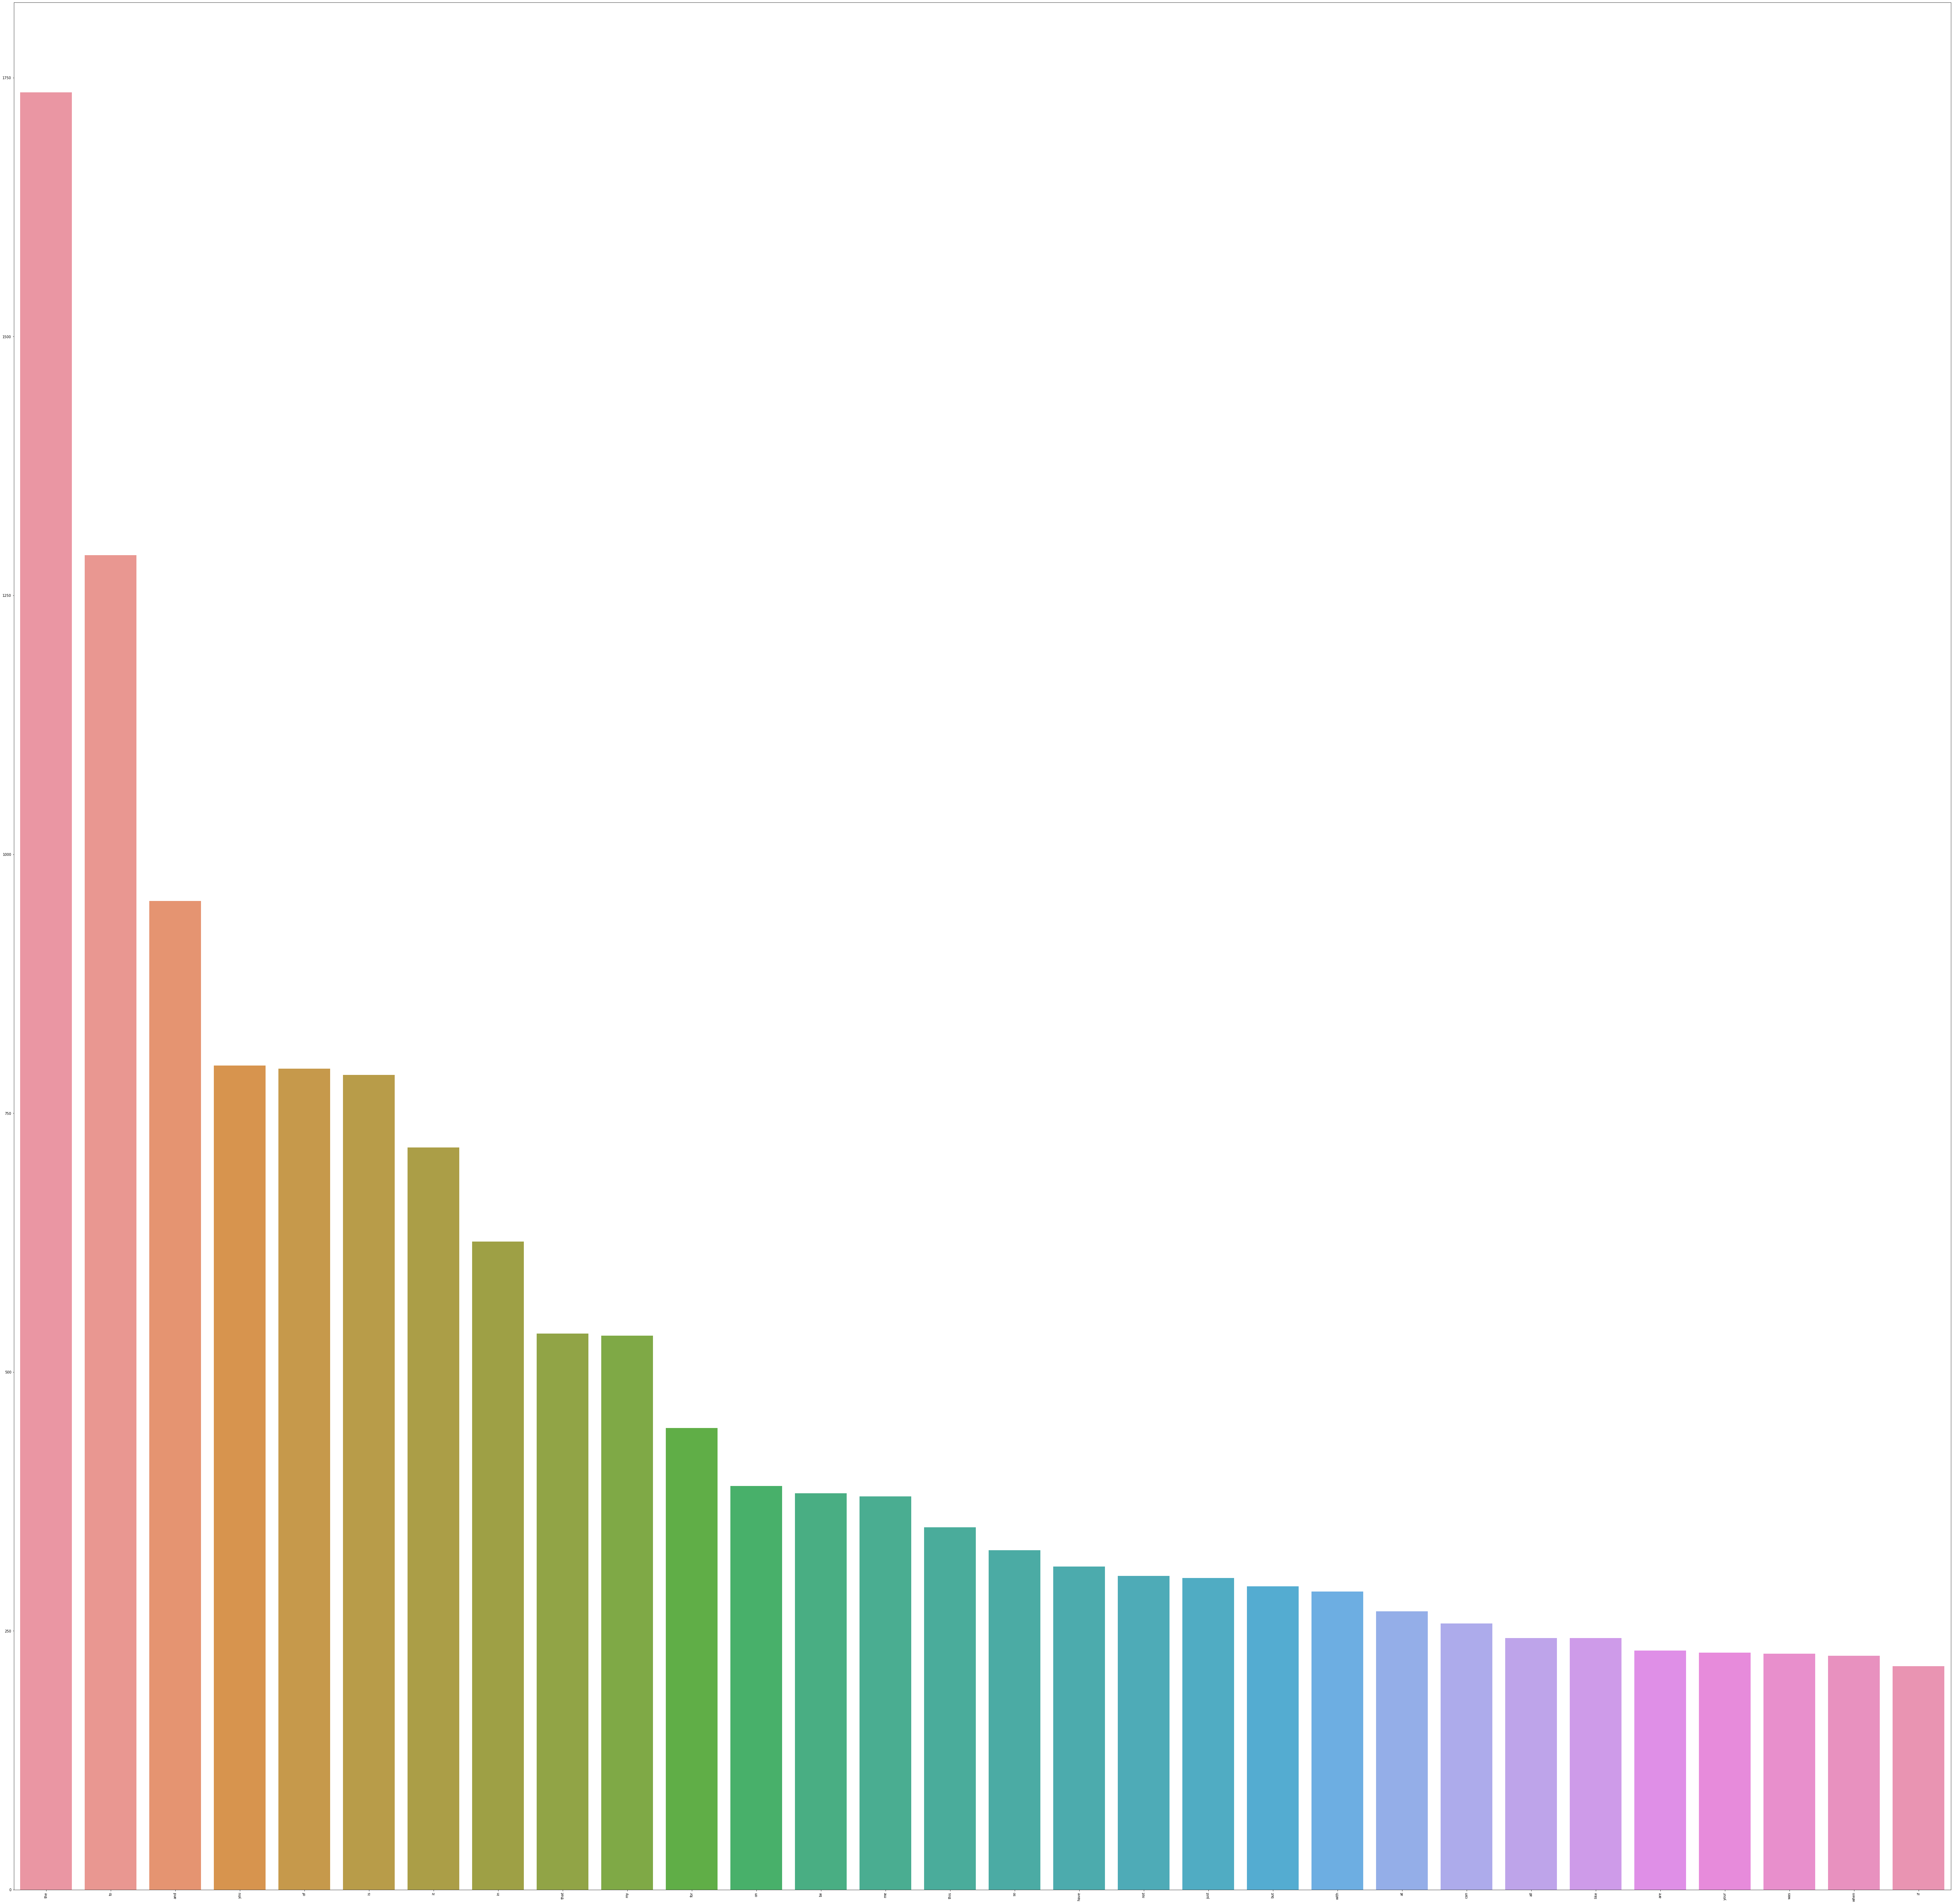

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(100, 100))
g = sns.barplot(x=plotx[:30], 
            y=ploty[:30])
g.set_xticklabels(plotx[:30], rotation = 90);


---
### 1.2 Save data

In [19]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [20]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [21]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

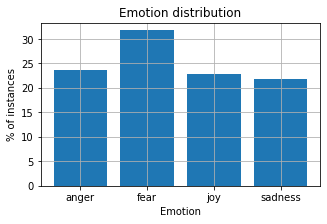

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [25]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [26]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [27]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [28]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [30]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [31]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [32]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [33]:
train_data_BOW_features_500.toarray()

array([[0, 7, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'customer',
 'damn']

In [35]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [36]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
response=vectorizer.fit_transform(feature_names)[0:1000]
print (response)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0
  (22, 22)	1.0
  (23, 23)	1.0
  (24, 24)	1.0
  :	:
  (975, 975)	1.0
  (976, 976)	1.0
  (977, 977)	1.0
  (978, 978)	1.0
  (979, 979)	1.0
  (980, 980)	1.0
  (981, 981)	1.0
  (982, 982)	1.0
  (983, 983)	1.0
  (984, 984)	1.0
  (985, 985)	1.0
  (986, 986)	1.0
  (987, 987)	1.0
  (988, 988)	1.0
  (989, 989)	1.0
  (990, 990)	1.0
  (991, 991)	1.0
  (992, 992)	1.0
  (993, 993)	1.0
  (994, 994)	1.0
  (995, 995)	1.0
  (996, 996)	1.0
  (997, 997)	1.0
  (998, 998)	1.0
  (999, 999)	1.0


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

#print "Num words:", len(vectorizer.feature_names())
#TfidfVectorizer.feature_names()[100:110]

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [41]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'joy', 'joy', 'fear', 'anger', 'anger', 'joy',
       'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [42]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.64


In [43]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [44]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [45]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

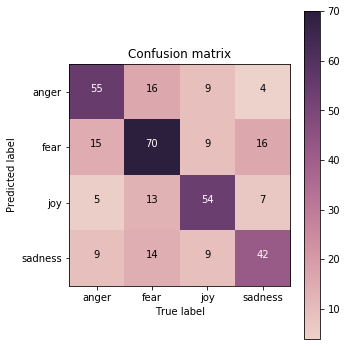

In [46]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
A confusion matrix is used to summarize the classification of a matrix. In the results above, we see that a total of 55 values were classified as anger. We also note that the 15 values that should have been fear were classified as anger, 5 which should have been joy were also classified as anger and 9 values that should have been sadness were also classified as anger. According to research these values are called "omission errors" because they are values that belong to one specific class but were predicted to be of a different class. Therefore these errors represent false negative values. If we read all of the other labels down their column we can also notice the same trend. 

If we continue to read the matrix row of anger, we notice that the values for fear(16), joy(9) and sadness(4) were supposed to be in fact values of those 3 labels respectively but were classified as anger. That is considered to be comission erros because they are values that were predicted to be of the specific class but do not belong to that class. Comission errors represent false positives. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [49]:
# Answer here
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50, tol=1e-3), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()



Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)
train time: 0.288s
test time:  0.013s
accuracy:   0.732
dimensionality: 500
density: 1.000000



AttributeError: 'Values' object has no attribute 'print_report'

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
It can be said that Decision Trees are very easy to understand, easy to interpret and to detect any errors. They can classify unknown records at a very fast pace and the accuracy using this type of model is very high. On the other hand, the Naïve Bayes Classifier does not yield high accuracy because of the dependency between the variables and the classes. 

From our results we see exactly that. The decision tree yeilded a very high accuracy of 0.99 on our trainign set and the test set yeilded an accuracy of 0.64. The Naive Bayes classifier on the other hand ....


---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [50]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

ModuleNotFoundError: No module named 'keras'

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [51]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3213    sadness
5         anger
3111    sadness
595       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


NameError: name 'keras' is not defined

### 6.3 Build model

In [33]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [34]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Using TensorFlow backend.


SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

### 6.4 Train

In [35]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Using TensorFlow backend.


SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

### 6.5 Predict on testing data

In [36]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

NameError: name 'model' is not defined

In [41]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'anger', 'joy', 'anger'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [43]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.370053,1.326438,0.452450,1.268567
1,1,0.654304,0.980068,0.662824,0.912151
2,2,0.802103,0.566359,0.717579,0.751141
3,3,0.863272,0.390703,0.720461,0.757825
4,4,0.898146,0.306216,0.711816,0.806985
5,5,0.915029,0.247102,0.694524,0.877231
6,6,0.934957,0.206622,0.700288,0.925531
7,7,0.946859,0.169036,0.680115,0.964210
8,8,0.955992,0.150810,0.668588,1.064577
9,9,0.959590,0.129380,0.674352,1.110407


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [44]:
# Answer here
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# split into input (X) and output (Y) variables
X = train_df[:,0:8]
Y = test_df[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [45]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
490,10490,Take public opinion on revenge with Pakistan i...,"[Take, public, opinion, on, revenge, with, Pak..."
1875,21018,My goals are so big they scare small minds,"[My, goals, are, so, big, they, scare, small, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...","[@, PanicAtTheDisco, hey, ,, y'all, announced,..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo..."
432,10432,@sarah_urbina why do you even beef Sara you le...,"[@, sarah_urbina, why, do, you, even, beef, Sa..."


In [46]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Take', 'public', 'opinion', 'on', 'revenge', 'with', 'Pakistan', 'if', 'govt', 'is', 'unable', 'to', 'decide', '.', '@', 'aajtak', '@', 'TimesNow', '@', 'narendramodi']),
       list(['My', 'goals', 'are', 'so', 'big', 'they', 'scare', 'small', 'minds']),
       list(['@', 'PanicAtTheDisco', 'hey', ',', "y'all", 'announced', 'it', 'like', 'immediately', 'after', 'I', 'asked', '.', 'Nice', '.', 'Thanks', "y'all", '#', 'panic'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [47]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
490,10490,Take public opinion on revenge with Pakistan i...,"[Take, public, opinion, on, revenge, with, Pak..."
1875,21018,My goals are so big they scare small minds,"[My, goals, are, so, big, they, scare, small, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...","[@, PanicAtTheDisco, hey, ,, y'all, announced,..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo..."
432,10432,@sarah_urbina why do you even beef Sara you le...,"[@, sarah_urbina, why, do, you, even, beef, Sa..."


In [48]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [49]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.24391222,  0.47471216,  0.60607815,  0.6043044 ,  0.30354637,
        0.52612245,  0.15907517,  0.31419995,  0.6662399 ,  0.34005383,
        0.23928903, -0.61682016,  0.26809034,  0.9209747 ,  0.5685452 ,
        0.17348199, -0.22674245,  0.5710754 , -0.35357958,  0.28677517,
        0.01680611, -0.82201445, -0.52795696, -0.3910232 , -0.8960669 ,
        0.14471053,  0.00526888, -0.86870104,  0.08562313,  0.44321737,
        0.36372796,  0.43732086, -0.3116185 , -0.46474335, -0.1590641 ,
        0.22266756, -0.4517335 ,  0.0837204 , -0.29009768,  0.87018347,
       -0.09992531, -0.6604294 , -0.29516825,  0.6239462 ,  0.08360109,
        0.38526478,  0.45437548, -1.1009585 , -0.46836132,  0.12104732,
       -0.3106531 ,  0.7249717 ,  0.1630029 ,  1.2424423 , -0.22231476,
       -0.2038668 ,  0.8779491 ,  0.3843941 ,  0.04376961, -0.2400986 ,
        0.19544724, -0.20151754,  0.18958779, -0.39637595, -0.4278381 ,
       -0.20163637,  0.37303543,  0.12325621,  0.9450939 ,  0.48

In [50]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('blessed', 0.9530322551727295),
 ('Online', 0.9481726884841919),
 ('bday', 0.940153956413269),
 ('free', 0.9350682497024536),
 ("'you", 0.9343327283859253),
 ('O', 0.9317790865898132),
 ('birthday', 0.9302517175674438),
 ('Be', 0.9287924766540527),
 ('.\\nA', 0.9231827259063721),
 ('inadvertently', 0.9227174520492554)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [51]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [52]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [53]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [54]:
# Answer here
#To implement or use the word vectors we need to utilize the keras library Embedding
#It will be used to load pretrained word embeddings and train a new model
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

#

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [55]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [56]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [57]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [58]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

In [59]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

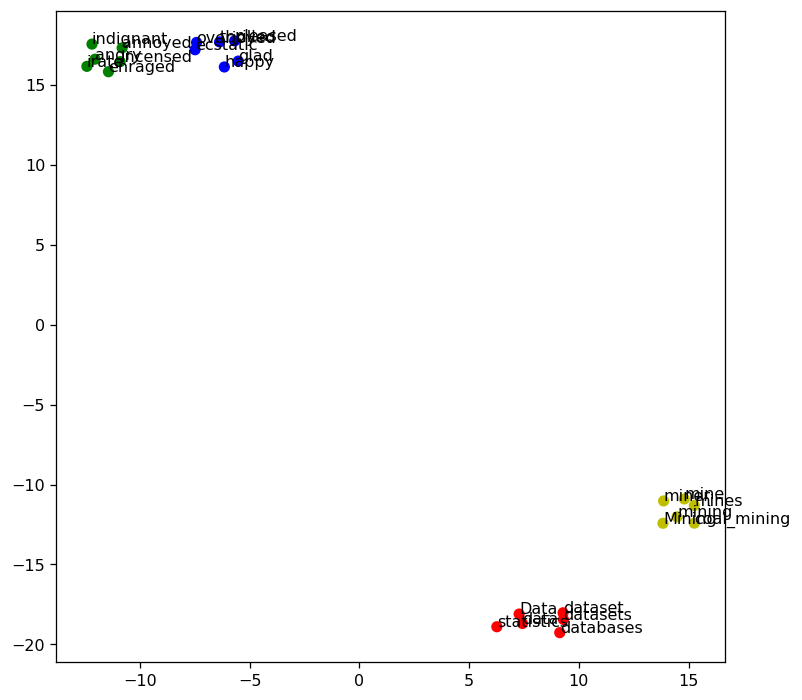

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
# Answer here
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 60
target_size = len(target_words['angry', 'happy', 'sad', 'fear'])
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=15, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## 10. Elmo embeddings

In [62]:
from keras.preprocessing.text import Tokenizer

#Initializing tokenizer, getting rid of some punctuation
tokenizer_keras = Tokenizer(filters='"#%&()*+,-./:;<=>@[\]^`{|}~')
tokenizer_keras.fit_on_texts(train_df['text'])
train_df['text_tok_keras'] = tokenizer_keras.texts_to_sequences(train_df['text'])
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426]"
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513]"
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ..."


In [63]:
#check the lenght of the tokenized sentences
list(map(lambda x: len(x), train_df['text_tok_keras'].iloc[:5]))

[16, 9, 14, 4, 24]

As we discudded, the lenght of the tokenized sentences is not the same, so we pad.

In [64]:
from keras.preprocessing.sequence import pad_sequences

#pad sequences
maxlen = 30 # arbitrary
padded_tokens = pad_sequences(train_df['text_tok_keras'],  maxlen=maxlen, padding="post")
train_df['text_tok_keras'] = list(padded_tokens)
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426, 0,..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513, 0, 0, 0, 0, 0, 0, 0, 0,..."
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ..."


Now we map back to words to obtain the padded tokenized representations in the text_tok_keras_words column.

In [65]:
#map back to words
reverse_word_map = dict(map(reversed, tokenizer_keras.word_index.items()))
train_df['text_tok_keras_words'] = train_df['text_tok_keras'].apply(lambda x_list: [reverse_word_map[x] if x>0 else "" for x in x_list])
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras,text_tok_keras_words
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ...","[take, public, opinion, on, revenge, with, pak..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426, 0,...","[my, goals, are, so, big, they, scare, small, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3...","[panicatthedisco, hey, y'all, announced, it, l..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513, 0, 0, 0, 0, 0, 0, 0, 0,...","[christy_rtr, doge_e_fresh, i'm, despondent, ,..."
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ...","[sarah_urbina, why, do, you, even, beef, sara,..."


In [66]:
import tensorflow as tf
import tensorflow_hub as hub

#load elmo
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable = True)

#generic way to generate an array of the same length
token_len = np.empty(len(train_df))
token_len.fill(maxlen)

#create embeddings
embeddings = elmo(inputs={"tokens": list(train_df['text_tok_keras_words']),
                          "sequence_len": token_len},
                  signature="tokens",
                  as_dict=True)["elmo"]


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [67]:
#check the Embedding layer dimension
embeddings.shape

TensorShape([Dimension(3613), Dimension(30), Dimension(1024)])

To embed a word, you need to pass the position of the token. Let's take the first sentence:

In [10]:
train_df['text'].iloc[0]

'@SusannahSpot I could pop round '

In [ ]:
# this might take a long time, make sure you can run Tf on your computer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print("SusannahSpot")
print(sess.run(embeddings[0][1]))

print("I")
print(sess.run(embeddings[0][1]))

print("could")
print(sess.run(embeddings[0][2]))

print("pop")
print(sess.run(embeddings[0][3]))

print("round")
print(sess.run(embeddings[0][4]))

---